In [ ]:
!pip install clip-retrieval img2dataset

In [12]:
!echo 'https://placekitten.com/200/305' >> myimglist.txt
!echo 'https://placekitten.com/200/304' >> myimglist.txt
!echo 'https://placekitten.com/200/303' >> myimglist.txt

In [18]:
!img2dataset --url_list=myimglist.txt --output_folder=image_folder --thread_count=64 --image_size=256

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 16.53it/s]


In [20]:
!clip-retrieval inference  --input_dataset image_folder --output_folder embedding_folder

256it [00:00, 470.60it/s]


In [21]:
!ls -R embedding_folder

embedding_folder:
img_emb  metadata

embedding_folder/img_emb:
img_emb_0.npy

embedding_folder/metadata:
metadata_0.parquet


In [22]:
!clip-retrieval index --embeddings_folder=embedding_folder --index_folder=index_folder

Launching the whole pipeline 09/03/2021, 17:28:27
	Compute estimated construction time of the index 09/03/2021, 17:28:27
		-> Train: 16.7 minutes
		-> Add: 0.0 seconds
		Total: 16.7 minutes
	>>> Finished "Compute estimated construction time of the index" in 0.0000 secs
	Checking that your have enough memory available to create the index 09/03/2021, 17:28:27
	>>> Finished "Checking that your have enough memory available to create the index" in 0.0002 secs
	Selecting most promising index types given data characteristics 09/03/2021, 17:28:27
	>>> Finished "Selecting most promising index types given data characteristics" in 0.0002 secs
	Creating the index 09/03/2021, 17:28:27
		-> Instanciate the index Flat 09/03/2021, 17:28:27
		>>> Finished "-> Instanciate the index Flat" in 0.0006 secs
		-> Extract training vectors 09/03/2021, 17:28:27
100%|███████████████████████████████████████████| 1/1 [00:00<00:00, 5023.12it/s]
		>>> Finished "-> Extract training vectors" in 0.0011 secs
		-> Trainin

In [24]:
!clip-retrieval filter --query "cat" --output_folder "cat/" --indice_folder "index_folder"

Found 100 items with query 'cat'
The minimum distance is -340282346638528859811704183484516925440.00 and the maximum is 0.26
You may want to use these numbers to increase your --num_results parameter. Or use the --threshold parameter.
Copying the images in cat/


In [25]:
!ls

cat				      embedding_folder	index_folder
clip-retrieval-getting-started.ipynb  image_folder	myimglist.txt


In [26]:
ls -R cat

cat:
0000.jpg  0001.jpg  0002.jpg  0003.jpg  0004.jpg  0005.jpg


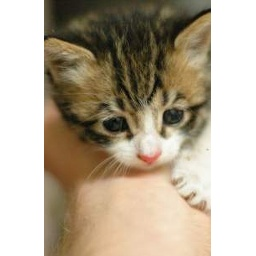

In [28]:
from IPython.display import Image
Image(filename='cat/000000000.jpg') 